# Extinction Correction and Zero Points

### This requires splusdata 4.22

In this notebook, we will go through the process of correcting astronomical magnitudes for extinction and retrieving zero points in S-PLUS. 

We will cover:
- Retrieving zero points from a catalog.
- Applying extinction correction to photometric bands.
- Visualizing the extinction-corrected magnitudes for objects.

### Retrieving the zero points

splusdata has a function to retrieve the zero points from the S-PLUS catalog.

The source catalog for each data release can also be found in the [S-PLUS website](http://splus.cloud/documentation).

In [1]:
import splusdata

conn = splusdata.Core()

In [4]:
ra = 157.3058167
dec = -44.1229222

In [5]:
print("Source catalog")
print(splusdata.features.zeropoints.source_cat)
splusdata.get_zeropoint(conn, ra, dec, band = 'all')

Source catalog
https://splus.cloud/files/documentation/iDR4/tabelas/iDR4_zero-points.csv


,Field,RA,DEC,ZP_u,ZP_J0378,ZP_J0395,ZP_J0410,ZP_J0430,ZP_g,ZP_J0515,ZP_r,ZP_J0660,ZP_i,ZP_J0861,ZP_z
136,HYDRA_0148,157.38,-44.57,20.483,19.772,19.776,20.886,21.037,23.437,21.391,23.494,21.014,23.29,21.557,22.733


In [6]:
splusdata.get_zeropoint(conn, ra, dec, band = 'r')

23.494

### Applying Extinction Correction

`splusdata` also has a function to apply extinction correction to the magnitudes of objects.

In [2]:
# load the extinction map, if not already downloaded
ext = splusdata.features.extinction.SplusExtinction(
    dustmap_dir = "dustmaps/"
)

ext.prepare_map()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# get our example table from the lsdb example
df = pd.read_csv("tables/some_galaxies_match_dr4dual.csv")
df

,_hipscat_index,FIELD_,ID_,RA_,DEC_,r_petro_,zb_,zb_Min_,zb_Max_,PROB_GAL_new_,...,e_z_auto_dual,e_u_auto_dual,e_J0378_auto_dual,e_J0395_auto_dual,e_J0410_auto_dual,e_J0430_auto_dual,e_J0515_auto_dual,e_J0660_auto_dual,e_J0861_auto_dual,_dist_arcsec
0,151960296620032,STRIPE82-0064,SPLUS.STRIPE82-0064.09756.griz,44.5248,0.4364,15.99,0.070,0.065,0.074,1.00,...,0.010472,0.110393,0.119585,0.145256,0.112169,0.066297,0.026812,0.007813,0.013805,0.150316
1,186235276492800,STRIPE82-0064,SPLUS.STRIPE82-0064.13149.griz,44.4441,0.5917,16.90,0.130,0.051,0.135,1.00,...,0.018859,0.157074,0.210177,0.255506,0.160339,0.099440,0.043700,0.014312,0.024750,0.183408
2,195722100080640,STRIPE82-0064,SPLUS.STRIPE82-0064.14326.griz,44.6020,0.6377,15.37,0.034,0.032,0.035,1.00,...,0.013745,0.052349,0.080611,0.054436,0.047681,0.042359,0.023627,0.009904,0.020323,0.193654
3,750897177034752,STRIPE82-0064,SPLUS.STRIPE82-0064.19483.griz,43.6273,1.2210,16.98,0.092,0.084,0.110,1.00,...,0.015228,0.280907,0.163096,0.234974,0.164247,0.123088,0.035939,0.011302,0.020236,0.132357
4,649699186966528,STRIPE82-0064,SPLUS.STRIPE82-0064.21473.griz,44.6013,1.1386,16.16,0.138,0.131,0.145,1.00,...,0.019261,0.162109,0.266185,0.193919,0.145862,0.124025,0.049350,0.015397,0.022174,0.152594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,13834483399286325248,STRIPE82-0109,SPLUS.STRIPE82-0109.32427.griz,315.8608,-0.7455,16.94,0.116,0.105,0.122,1.00,...,0.015893,0.061282,0.137266,0.146852,0.199915,0.139537,0.045471,0.014488,0.028453,0.169474
8749,13834489996393840640,STRIPE82-0109,SPLUS.STRIPE82-0109.35704.griz,315.6410,-0.7080,16.46,0.065,0.060,0.098,0.99,...,0.022127,2.947137,0.153139,0.258498,2.756481,0.100162,0.048756,0.019578,0.042381,0.038799
8750,13834867787824103424,STRIPE82-0109,SPLUS.STRIPE82-0109.38038.griz,315.4831,-0.6444,16.96,0.177,0.172,0.193,1.00,...,0.013705,0.314612,1.074042,0.599592,0.272908,0.344353,0.064248,0.014051,0.025616,0.115460
8751,13834886915851026432,STRIPE82-0109,SPLUS.STRIPE82-0109.39414.griz,315.2953,-0.6332,15.33,0.074,0.071,0.078,1.00,...,0.005237,0.104240,0.088146,0.103394,0.101113,0.051814,0.017873,0.005165,0.009292,0.204283


#### Plotting the magnitudes without extinction correction

In [4]:
print(df.columns)

Index(['_hipscat_index', 'FIELD_', 'ID_', 'RA_', 'DEC_', 'r_petro_', 'zb_',
       'zb_Min_', 'zb_Max_', 'PROB_GAL_new_', 'SPIRAL_', 'ELLIPTICAL_',
       'UNCERTAIN_', 'simple_class_', 'Norder_', 'Dir_', 'Npix_', 'ID_dual',
       'RA_dual', 'DEC_dual', 'r_auto_dual', 'g_auto_dual', 'i_auto_dual',
       'z_auto_dual', 'u_auto_dual', 'J0378_auto_dual', 'J0395_auto_dual',
       'J0410_auto_dual', 'J0430_auto_dual', 'J0515_auto_dual',
       'J0660_auto_dual', 'J0861_auto_dual', 'e_r_auto_dual', 'e_g_auto_dual',
       'e_i_auto_dual', 'e_z_auto_dual', 'e_u_auto_dual', 'e_J0378_auto_dual',
       'e_J0395_auto_dual', 'e_J0410_auto_dual', 'e_J0430_auto_dual',
       'e_J0515_auto_dual', 'e_J0660_auto_dual', 'e_J0861_auto_dual',
       '_dist_arcsec'],
      dtype='object')


In [5]:
print(splusdata.BANDS)

mag_cols = [col + "_auto_dual" for col in splusdata.BANDS]
mag_err_cols = ["e_" + col + "_auto_dual" for col in splusdata.BANDS]

print(mag_cols)
print(mag_err_cols)

['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']
['u_auto_dual', 'J0378_auto_dual', 'J0395_auto_dual', 'J0410_auto_dual', 'J0430_auto_dual', 'g_auto_dual', 'J0515_auto_dual', 'r_auto_dual', 'J0660_auto_dual', 'i_auto_dual', 'J0861_auto_dual', 'z_auto_dual']
['e_u_auto_dual', 'e_J0378_auto_dual', 'e_J0395_auto_dual', 'e_J0410_auto_dual', 'e_J0430_auto_dual', 'e_g_auto_dual', 'e_J0515_auto_dual', 'e_r_auto_dual', 'e_J0660_auto_dual', 'e_i_auto_dual', 'e_J0861_auto_dual', 'e_z_auto_dual']


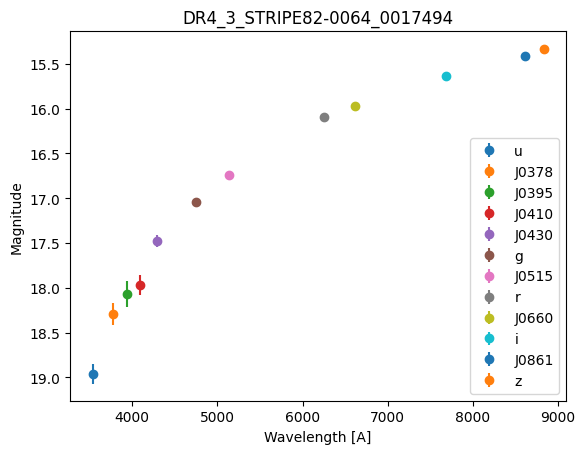

In [6]:
# selecting object
row = df.iloc[0]

for i, band in enumerate(splusdata.BANDS):          
    plt.errorbar(splusdata.WAVELENGHTS[i], row[mag_cols[i]], yerr=row[mag_err_cols[i]], fmt='o', label=band)

plt.title(row["ID_dual"])
plt.gca().invert_yaxis()    
plt.xlabel("Wavelength [A]")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Get extinction values and apply extinction correction

In [7]:
df = ext.get_extinction(df, ra_col = "RA_dual", dec_col = "DEC_dual")

df = ext.apply(
    df, 
    mag_cols = mag_cols # it is important to be in ascending order by wavelength
)

In [8]:
df.columns

Index(['_hipscat_index', 'FIELD_', 'ID_', 'RA_', 'DEC_', 'r_petro_', 'zb_',
       'zb_Min_', 'zb_Max_', 'PROB_GAL_new_', 'SPIRAL_', 'ELLIPTICAL_',
       'UNCERTAIN_', 'simple_class_', 'Norder_', 'Dir_', 'Npix_', 'ID_dual',
       'RA_dual', 'DEC_dual', 'r_auto_dual', 'g_auto_dual', 'i_auto_dual',
       'z_auto_dual', 'u_auto_dual', 'J0378_auto_dual', 'J0395_auto_dual',
       'J0410_auto_dual', 'J0430_auto_dual', 'J0515_auto_dual',
       'J0660_auto_dual', 'J0861_auto_dual', 'e_r_auto_dual', 'e_g_auto_dual',
       'e_i_auto_dual', 'e_z_auto_dual', 'e_u_auto_dual', 'e_J0378_auto_dual',
       'e_J0395_auto_dual', 'e_J0410_auto_dual', 'e_J0430_auto_dual',
       'e_J0515_auto_dual', 'e_J0660_auto_dual', 'e_J0861_auto_dual',
       '_dist_arcsec', 'ext_u', 'ext_J0378', 'ext_J0395', 'ext_J0410',
       'ext_J0430', 'ext_g', 'ext_J0515', 'ext_r', 'ext_J0660', 'ext_i',
       'ext_J0861', 'ext_z'],
      dtype='object')

### Plotting the extinction values and magnitudes with extinction correction

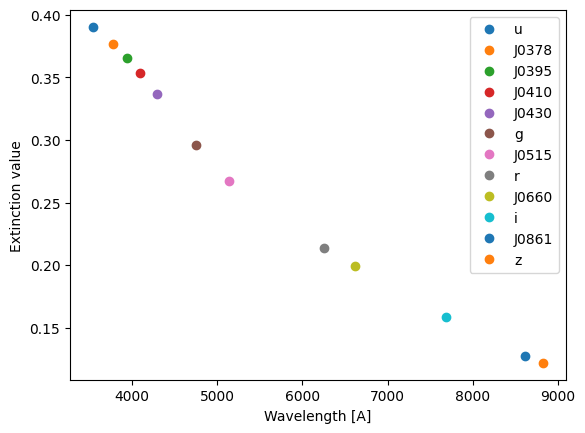

In [20]:
# values of the extinction
ext_cols = ["ext_" + col for col in splusdata.BANDS]

row = df.iloc[0]

for i, band in enumerate(splusdata.BANDS):          
    plt.errorbar(splusdata.WAVELENGHTS[i], row[ext_cols[i]], fmt='o', label=band)

plt.xlabel("Wavelength [A]")
plt.ylabel("Extinction value")
plt.legend()
plt.show()


In [25]:
# columns with the extinction corrected magnitudes
extcorr_cols = [col + "_auto_dual_extcorr" for col in splusdata.BANDS]

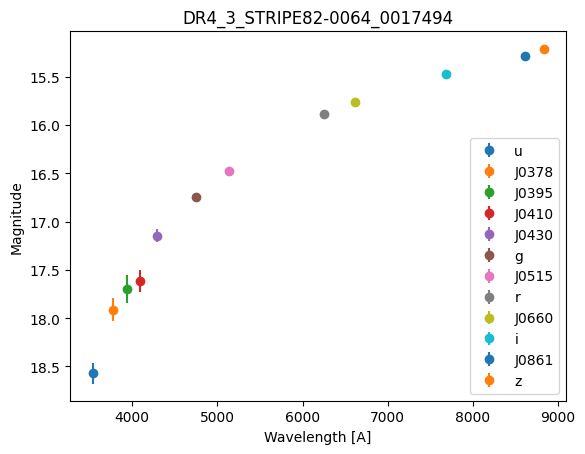

In [27]:
# selecting object
row = df.iloc[0]

for i, band in enumerate(splusdata.BANDS):          
    plt.errorbar(splusdata.WAVELENGHTS[i], row[extcorr_cols[i]], yerr=row[mag_err_cols[i]], fmt='o', label=band)

plt.title(row["ID_dual"])
plt.gca().invert_yaxis()    
plt.xlabel("Wavelength [A]")
plt.ylabel("Magnitude")
plt.legend()
plt.show()